In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

%matplotlib inline

In [3]:
original_images = []
addresses = ['usps_1.jpg', 'usps_2.jpg', 'usps_3.jpg', 'usps_4.jpg', 'usps_5.jpg']

for i in range(len(addresses)):
    original_images.append(plt.imread(addresses[i]))

In [4]:
row = int(original_images[0].shape[0] / 16)
column = int(original_images[0].shape[1] / 16)

print("r: ", row, " column: ", column)

r:  34  column:  33


In [5]:
d = 16
X_list = []
for img in original_images:
    for i in range(row):
        for j in range(column):
            img_digit_one = img[i * d: (i + 1) * d, j * d: (j + 1) * d]
            x = img_digit_one.reshape(1,-1)
            if not ((i > 11) and (j == column - 1)):
                X_list.append(x)
X = np.concatenate(X_list, axis=0)
print(X[0].shape)

(256,)


In [6]:
def L2_norm(A, B):
    norm = 0.0
    n = len(A)

    for i in range(n):
        norm += (A[i] - B[i]) ** 2

    return norm

In [7]:
def closest_centroid(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """
    idx = np.zeros(X.shape[0], dtype = int)

    for i in range(X.shape[0]):
        min_distance = math.inf
        cluster = -1
        for j in range(centroids.shape[0]):
            L2_norm = np.linalg.norm(X[i] - centroids[j])
            if L2_norm < min_distance:
                min_distance = L2_norm
                cluster = j
        idx[i] = cluster

    return idx

In [8]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    centroids = np.zeros((K, X.shape[1]))

    for k in range(K):
        points_cluster_k = X[idx == k]
        centroids[k] = np.mean(points_cluster_k, axis=0)

    return centroids

In [9]:
def k_means(X, initial_centroids, num_iterations):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = copy.deepcopy(initial_centroids)
    idx = np.ndarray((m,))

    for i in range(num_iterations):
        idx = closest_centroid(X, centroids)
        centroids = compute_centroids(X, idx, K)

    return idx, centroids

In [10]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

In [62]:
K = 5
initial_centroids = kMeans_init_centroids(X, K)

iterations = 200

idx, centroids = k_means(X, initial_centroids, iterations)
print(idx[:5500:100])

[1 1 1 1 1 2 2 2 2 1 4 2 2 4 0 2 2 2 2 2 2 2 3 3 3 4 4 3 4 3 4 3 4 0 0 0 0
 0 0 1 0 0 0 1 4 3 4 3 3 3 3 0 4 3 3]


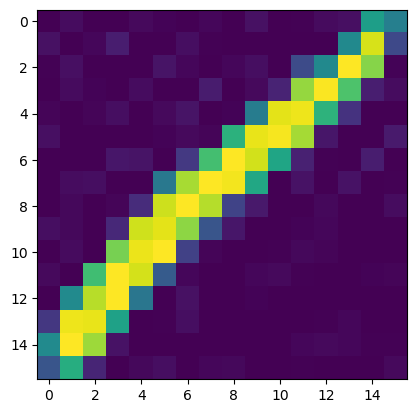

In [63]:
test = 1
img_test = X[idx == test]
n = len(img_test)
i = int(n / 5)
plt.imshow(img_test[0].reshape(16,16))

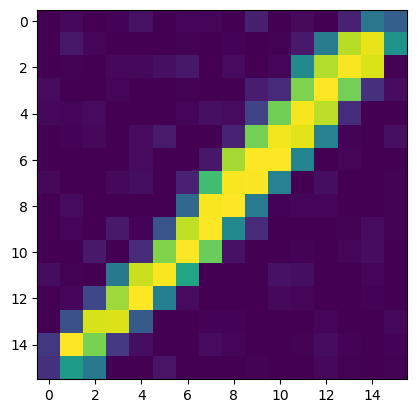

In [64]:
plt.imshow(img_test[2 * i].reshape(16,16))

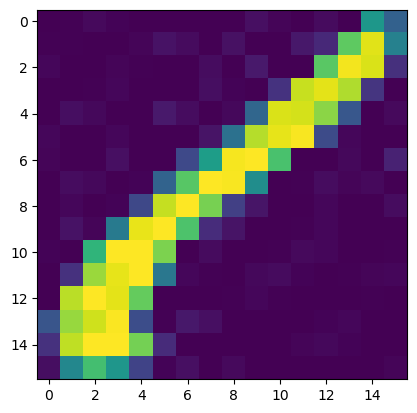

In [65]:
plt.imshow(img_test[3 * i].reshape(16,16))

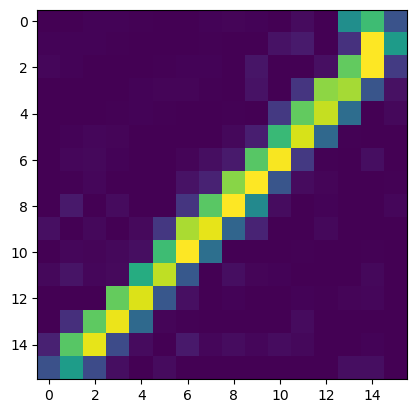

In [66]:
plt.imshow(img_test[4 * i].reshape(16,16))

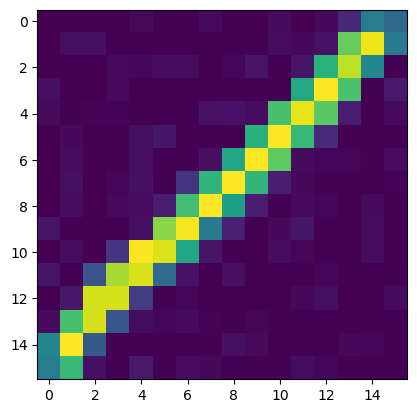

In [67]:
plt.imshow(img_test[i - 1].reshape(16,16))